In [ ]:
import pandas as pd

In [ ]:
pd.__version__

'1.3.5'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Dataset/Sentimental analysis dataset(1) .csv")

In [ ]:
data.head()

,sent_id,sentence,sentiment
0,1,பின்னணி இசையிலும் பின்னி பெடலெடுத்துள்ளார் சந்...,positive
1,2,ரஞ்சித் சூப்பர்ஸ்டாரை தன்னுடைய கதைக்கேற்ப முழு...,neutral
2,3,படத்தில் தன்னுடைய வழக்கமான பல சிம்பாளிக் காட்ச...,neutral
3,4,வசனங்களில் அசத்தியுள்ளார்.,positive
4,5,அவருக்கே உரிய பாணியில் வழக்கம்போல் அழகாக நடித்...,positive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sent_id    450 non-null    int64 
 1   sentence   450 non-null    object
 2   sentiment  450 non-null    object
dtypes: int64(1), object(2)
memory usage: 10.7+ KB


In [ ]:
data.isnull()

,sent_id,sentence,sentiment
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
445,False,False,False
446,False,False,False
447,False,False,False
448,False,False,False


In [ ]:
data['sentiment'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

In [ ]:
p=0
ne=0
n=0
for i in data['sentiment']:
  if i == "positive":
    p=p+1
  elif i == "negative":
    ne=ne+1
  elif i == "neutral":
    n=n+1

print(p,ne,n)

172 161 117


In [ ]:
data['sentiment'].replace("neutral",0,inplace=True)
data['sentiment'].replace("positive",1,inplace=True)
data['sentiment'].replace("negative",2,inplace=True)


In [ ]:
data['sentiment'].unique()

array([1, 0, 2])

In [ ]:
data1=[]
data['tokenize']=""

In [ ]:
len(data)

450

In [ ]:
pip install trankit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 773 kB 8.1 MB/s 
     |████████████████████████████████| 880 kB 55.0 MB/s 
     |████████████████████████████████| 1.9 MB 48.1 MB/s 
     |████████████████████████████████| 1.3 MB 66.7 MB/s 
     |████████████████████████████████| 7.6 MB 47.3 MB/s 
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941188 sha256=9b73bc6595dabb06a03e13e1ac332443cc6c4e78826eb77f11ec169d06fbf4b4
  Stored in directory: /root/.cache/pip/wheels/2b/bb/7f/11e4db39477278161e882eadc46fb558949a28b13470fc74b8
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=cd150b0c4ef121c303de51c6b6e77202306f6d776ac744be0a40fbccd7b97140
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built langid sacremoses


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 6.4 MB/s 
     |████████████████████████████████| 163 kB 75.2 MB/s 


In [ ]:
from trankit import Pipeline

In [ ]:
p=Pipeline('tamil')

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

http://nlp.uoregon.edu/download/trankit/v1.0.0/xlm-roberta-base/tamil.zip


Downloading: 100%|██████████| 26.4M/26.4M [00:00<00:00, 52.9MiB/s]


Loading pretrained XLM-Roberta, this may take a while...


Downloading:   0%|          | 0.00/512 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Loading tokenizer for tamil
Loading tagger for tamil
Loading multi-word expander for tamil
Loading lemmatizer for tamil
Active language: tamil


In [ ]:
temp="அதே நேரத்தில் சண்டைக்காட்சிகளில் கொஞ்சம் இரைச்சலையும் தருகின்றது."
a=p.tokenize(temp,is_sent="True")

In [ ]:
dict=a['tokens'][2]

In [ ]:
dict['text']

'சண்டைக்காட்சிகளில்'

In [ ]:
#TOKENIZATION
i=0
count=0
for i in range(len(data)):
    ls=[]
    data1 = p.tokenize(str(data['sentence'].iloc[i]),is_sent="True")
    for j in range(len(data1['tokens'])):
      temp = data1['tokens'][j]
      ls.append(str(temp['text']))
    data['tokenize'].iloc[i]=ls

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
import re
import string

In [ ]:
stopwords=["ஒரு", 'என்று', 'மற்றும்', 'இந்த', 'இது', 'என்ற', 'கொண்டு', 'என்பது', 'பல', 'ஆகும்', 'அல்லது', 'அவர்', 'நான்', 'உள்ள', 'அந்த', 'இவர்', 'என', 'முதல்', 'என்ன', 'இருந்து', 'சில', 'என்', 'போன்ற', 'வேண்டும்', 'வந்து', 'இதன்', 'அது', 'அவன்', 'தான்', 'பலரும்', 'என்னும்', 'மேலும்', 'பின்னர்', 'கொண்ட', 'இருக்கும்', 'தனது', 'உள்ளது', 'போது', 'என்றும்', 'அதன்', 'தன்', 'பிறகு', 'அவர்கள்', 'வரை', 'அவள்', 'நீ', 'ஆகிய', 'இருந்தது', 'உள்ளன', 'வந்த', 'இருந்த', 'மிகவும்', 'இங்கு', 'மீது', 'ஓர்', 'இவை', 'இந்தக்', 'பற்றி', 'வரும்', 'வேறு', 'இரு', 'இதில்', 'போல்', 'இப்போது', 'அவரது', 'மட்டும்', 'இந்தப்', 'எனும்', 'மேல்', 'பின்', 'சேர்ந்த', 'ஆகியோர்', 'எனக்கு', 'இன்னும்', 'அந்தப்', 'அன்று', 'ஒரே', 'மிக', 'அங்கு', 'பல்வேறு', 'விட்டு', 'பெரும்', 'அதை', 'பற்றிய', 'உன்', 'அதிக', 'அந்தக்', 'பேர்', 'இதனால்', 'அவை', 'அதே', 'ஏன்', 'முறை', 'யார்', 'என்பதை', 'எல்லாம்', 'மட்டுமே', 'இங்கே', 'அங்கே', 'இடம்', 'இடத்தில்', 'அதில்', 'நாம்', 'அதற்கு', 'எனவே', 'பிற', 'சிறு', 'மற்ற', 'விட', 'எந்த', 'எனவும்', 'எனப்படும்', 'எனினும்', 'அடுத்த', 'இதனை', 'இதை', 'கொள்ள', 'இந்தத்', 'இதற்கு', 'அதனால்', 'தவிர', 'போல', 'வரையில்', 'சற்று', 'எனக்']


In [ ]:
#PUNCTUATION REMOVAL
punc = string.punctuation
data['no_punc'] = data['tokenize'].apply(lambda x: [word for word in x if word not in punc])
data.head(5)

,sent_id,sentence,sentiment,tokenize,no_punc
0,1,பின்னணி இசையிலும் பின்னி பெடலெடுத்துள்ளார் சந்...,1,"[பின்னணி, இசையிலும், பின்னி, பெடலெடுத்துள்ளார்...","[பின்னணி, இசையிலும், பின்னி, பெடலெடுத்துள்ளார்..."
1,2,ரஞ்சித் சூப்பர்ஸ்டாரை தன்னுடைய கதைக்கேற்ப முழு...,0,"[ரஞ்சித், சூப்பர்ஸ்டாரை, தன்னுடைய, கதைக்கேற்ப,...","[ரஞ்சித், சூப்பர்ஸ்டாரை, தன்னுடைய, கதைக்கேற்ப,..."
2,3,படத்தில் தன்னுடைய வழக்கமான பல சிம்பாளிக் காட்ச...,0,"[படத்தில், தன்னுடைய, வழக்கமான, பல, சிம்பாளிக்,...","[படத்தில், தன்னுடைய, வழக்கமான, பல, சிம்பாளிக்,..."
3,4,வசனங்களில் அசத்தியுள்ளார்.,1,"[வசனங்களில், அசத்தியுள்ளார், .]","[வசனங்களில், அசத்தியுள்ளார்]"
4,5,அவருக்கே உரிய பாணியில் வழக்கம்போல் அழகாக நடித்...,1,"[அவருக்கே, உரிய, பாணியில், வழக்கம்போல், அழகாக,...","[அவருக்கே, உரிய, பாணியில், வழக்கம்போல், அழகாக,..."


In [ ]:
#STOPWORDS REMOVAL
data['stopwords_removed'] = data['no_punc'].apply(lambda x: [word for word in x if word not in stopwords])
data.head(5)

,sent_id,sentence,sentiment,tokenize,no_punc,stopwords_removed
0,1,பின்னணி இசையிலும் பின்னி பெடலெடுத்துள்ளார் சந்...,1,"[பின்னணி, இசையிலும், பின்னி, பெடலெடுத்துள்ளார்...","[பின்னணி, இசையிலும், பின்னி, பெடலெடுத்துள்ளார்...","[பின்னணி, இசையிலும், பின்னி, பெடலெடுத்துள்ளார்..."
1,2,ரஞ்சித் சூப்பர்ஸ்டாரை தன்னுடைய கதைக்கேற்ப முழு...,0,"[ரஞ்சித், சூப்பர்ஸ்டாரை, தன்னுடைய, கதைக்கேற்ப,...","[ரஞ்சித், சூப்பர்ஸ்டாரை, தன்னுடைய, கதைக்கேற்ப,...","[ரஞ்சித், சூப்பர்ஸ்டாரை, தன்னுடைய, கதைக்கேற்ப,..."
2,3,படத்தில் தன்னுடைய வழக்கமான பல சிம்பாளிக் காட்ச...,0,"[படத்தில், தன்னுடைய, வழக்கமான, பல, சிம்பாளிக்,...","[படத்தில், தன்னுடைய, வழக்கமான, பல, சிம்பாளிக்,...","[படத்தில், தன்னுடைய, வழக்கமான, சிம்பாளிக், காட..."
3,4,வசனங்களில் அசத்தியுள்ளார்.,1,"[வசனங்களில், அசத்தியுள்ளார், .]","[வசனங்களில், அசத்தியுள்ளார்]","[வசனங்களில், அசத்தியுள்ளார்]"
4,5,அவருக்கே உரிய பாணியில் வழக்கம்போல் அழகாக நடித்...,1,"[அவருக்கே, உரிய, பாணியில், வழக்கம்போல், அழகாக,...","[அவருக்கே, உரிய, பாணியில், வழக்கம்போல், அழகாக,...","[அவருக்கே, உரிய, பாணியில், வழக்கம்போல், அழகாக,..."


In [ ]:
# sent=data['stopwords_removed'].iloc[0]
# print(sent)

In [ ]:
data["lemma"]=""

In [ ]:
#LEMMATIZATION
AA=0
for AA in range(len(data)):
  alp=data["stopwords_removed"].iloc[AA]
  temp=[]
  for AB in range(len(alp)):
    test=alp[AB]
    a=p.lemmatize(test)
    b=a['sentences']
    c=b[0]
    d=c['tokens']
    e=d[0]
    try:
      temp.append(e['lemma'])
    except:
      f=e['expanded']
      for i in range(len(f)):
        g=f[i]
        temp.append(g['lemma'])

  data["lemma"].iloc[AA]=temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
data['lemma']

0      [பின்னணி, இசை, உம், பின்னி, பெடலெடுத்து, உள், ...
1      [ரஞ்சித், சூப்பர், தன்னுடையம், கதை, முழுமையாக,...
2      [படத்து, தன்னுடையம், வழக்கம், சிம்பாளி, காட்சி...
3                                   [வசனம், அசத்து, உள்]
4      [அவர், உரிய, பாணி, வழக்கம்போல், அழகாகு, நடி, க...
                             ...                        
445     [சூப்பர், எதிர், பேசு, காட்சி, கைதட்டல், வாங்கு]
446    [ராதிகா, ஆப்தே, தோட்டம், வேலை, செய், பெண்ணாகு,...
447    [ஆனால், இவர், வாழ்க்கை, அதிகாரவவர், திசை, மாறு...
448          [கோலிசோடா, என்றாலே, வகை யதார்த்தம், படத்து]
449    [நாயகன், தினேஷ், டான்ஸ், மாஸ்டர், படு, மூலம், ...
Name: lemma, Length: 450, dtype: object

In [ ]:
import sklearn
from textblob import Word
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split

In [ ]:
sklearn.__version__

'1.0.2'

In [ ]:
#ENCODING
tokenizer = Tokenizer(num_words=1000, split=' ')
print(type(data['lemma'].values))
tokenizer.fit_on_texts(data['lemma'].values)
X = tokenizer.texts_to_sequences(data['lemma'].values)
X = pad_sequences(X)
print(X.shape)

<class 'numpy.ndarray'>
(450, 34)


In [ ]:
print(X)

[[  0   0   0 ...   4 203 633]
 [  0   0   0 ... 322 204   2]
 [  0   0   0 ...   6  13   4]
 ...
 [  0   0   0 ... 109  64  46]
 [  0   0   0 ... 138 432   9]
 [  0   0   0 ...  82 252 434]]


In [ ]:
model = Sequential()
model.add(Embedding(1000, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 120)           120000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 34, 120)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 176)               209088    
                                                                 
 dense (Dense)               (None, 3)                 531       
                                                                 
Total params: 329,619
Trainable params: 329,619
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
indep=X
dep=data['sentiment']
dep

0      1
1      0
2      0
3      1
4      1
      ..
445    1
446    0
447    0
448    0
449    1
Name: sentiment, Length: 450, dtype: int64

In [ ]:
from tensorflow.keras.utils import to_categorical
dep = to_categorical(data['sentiment'])
print(dep)

[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(indep,dep,test_size=0.2,random_state=42)
print(y_train)

[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [ ]:
x_train.shape

(360, 34)

In [ ]:
model.fit(x_train, y_train, epochs = 10, batch_size=32, verbose = 'auto')

Epoch 1/10
12/12 [==============================] - 4s 138ms/step - loss: 1.0846 - accuracy: 0.3972
Epoch 2/10
12/12 [==============================] - 2s 143ms/step - loss: 1.0713 - accuracy: 0.4667
Epoch 3/10
12/12 [==============================] - 2s 137ms/step - loss: 1.0459 - accuracy: 0.6278
Epoch 4/10
12/12 [==============================] - 2s 141ms/step - loss: 0.9919 - accuracy: 0.4833
Epoch 5/10
12/12 [==============================] - 2s 137ms/step - loss: 0.8642 - accuracy: 0.6528
Epoch 6/10
12/12 [==============================] - 2s 135ms/step - loss: 0.6442 - accuracy: 0.7222
Epoch 7/10
12/12 [==============================] - 2s 144ms/step - loss: 0.4674 - accuracy: 0.8528
Epoch 8/10
12/12 [==============================] - 2s 139ms/step - loss: 0.3227 - accuracy: 0.9111
Epoch 9/10
12/12 [==============================] - 2s 146ms/step - loss: 0.2318 - accuracy: 0.9389
Epoch 10/10
12/12 [==============================] - 2s 139ms/step - loss: 0.1756 - accuracy: 0.9528

In [ ]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 14ms/step - loss: 1.1055 - accuracy: 0.5556


[1.1054718494415283, 0.5555555820465088]

In [ ]:
print(x_test ,y_test)

[[  0   0   0 ...   8   1  66]
 [  0   0   0 ...  41 421  33]
 [  0   0   0 ... 860   2 861]
 ...
 [  0   0   0 ... 597  47 310]
 [  0   0   0 ...  59  24   2]
 [  0   0   0 ... 472 192 490]] [[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1.

In [ ]:
import numpy as np
act=[]
for t in range(len(y_test)):
  act.append(np.argmax(y_test[t]))
print(act)

[0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 0, 0, 2, 0, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 0]


In [ ]:
temp_p=model.predict(x_test)
predict=[]
for u in range(len(x_test)):
  predict.append(np.argmax(temp_p[u]))
print(predict)

3/3 [==============================] - 0s 20ms/step
[0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 2, 0, 1, 1, 1, 0, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 2, 2, 1, 2, 2, 1]


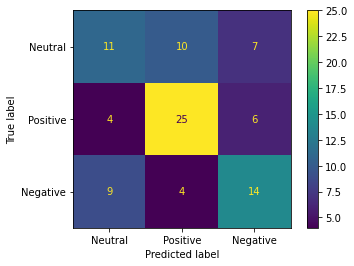

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

neutral = np.random.binomial(1,.9,size = 90)
positive = np.random.binomial(1,.9,size = 90)
negative = np.random.binomial(1,.9,size = 90)
confusion_matrix = metrics.confusion_matrix(act,predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Neutral', "Positive","Negative"])

cm_display.plot()
plt.show()

In [ ]:
import numpy as np
predict=model.predict(x_test)
print(predict)

3/3 [==============================] - 0s 11ms/step
[[8.50433171e-01 6.24923855e-02 8.70745033e-02]
 [2.30205711e-02 9.45546985e-01 3.14323977e-02]
 [1.82867616e-01 4.27084446e-01 3.90047878e-01]
 [3.69588405e-01 3.46794009e-01 2.83617556e-01]
 [3.94157469e-01 3.63937199e-01 2.41905317e-01]
 [4.34632540e-01 1.91450253e-01 3.73917252e-01]
 [2.33002409e-01 9.13263038e-02 6.75671339e-01]
 [9.97845888e-01 7.49284925e-04 1.40481547e-03]
 [7.19519198e-01 5.70364892e-02 2.23444343e-01]
 [5.54054499e-01 1.06669262e-01 3.39276224e-01]
 [6.20980978e-01 2.50657089e-02 3.53953272e-01]
 [2.41053209e-01 5.89252830e-01 1.69693902e-01]
 [7.80345639e-04 9.89337921e-01 9.88168642e-03]
 [2.53050834e-01 6.69054210e-01 7.78949410e-02]
 [3.41532052e-01 2.26786025e-02 6.35789335e-01]
 [6.73230216e-02 2.53380984e-02 9.07338858e-01]
 [5.70821881e-01 1.07983947e-01 3.21194112e-01]
 [2.48286291e-03 9.96674895e-01 8.42260313e-04]
 [8.35917175e-01 5.36125153e-02 1.10470317e-01]
 [8.17492697e-03 9.87440586e-01 4.38

In [ ]:
#Tokenize
i=0
count=0
def tokenize (data):
    ls=[]
    data1 = p.tokenize(str(data),is_sent="True")
    for j in range(len(data1['tokens'])):
      temp = data1['tokens'][j]
      ls.append(str(temp['text']))
    data=ls
    punc(data)

In [ ]:
#Punctuation Removal
def punc (data):
  ls=[]
  punc = string.punctuation
  for i in range(len(data)):
    temp=data[i]
    if temp not in punc:
      ls.append(temp)
  print(ls)
  stop(ls)

In [ ]:
#stopwords removal
def stop (data):
  ls=[]
  for i in range(len(data)):
    temp=data[i]
    if temp not in stopwords:
      ls.append(temp)
  print(ls)
  lemmatization(ls)

In [ ]:
#lemma
def lemmatization(data):
    alp=data
    temp=[]
    for AB in range(len(alp)):
      test=alp[AB]
      a=p.lemmatize(test)
      b=a['sentences']
      c=b[0]
      d=c['tokens']
      e=d[0]
      try:
        temp.append(e['lemma'])
      except:
        f=e['expanded']
        for i in range(len(f)):
          g=f[i]
          temp.append(g['lemma'])

    data=temp
    print(data)
    encode_predict(data)

In [ ]:
#Encoding
def encode_predict(data):
  data=" ".join(data)
  data=[data]
  # tokenizer = Tokenizer(num_words=1000, split=' ')
  print(data)
  tokenizer.fit_on_texts(data)
  X = tokenizer.texts_to_sequences(data)
  X = pad_sequences(X,maxlen=34)
  print(model.predict(X))
  index=np.argmax(model.predict(X))
  if index==0:
    print("Neutral Review")
  elif index==1:
    print("Positive Review")
  elif index==2:
    print("negative Review")

In [ ]:
sentence="பின்னணி இசையிலும் பின்னி பெடலெடுத்துள்ளார் சந்தோஷ் நாரயணன்."
tokenize(sentence)

['பின்னணி', 'இசையிலும்', 'பின்னி', 'பெடலெடுத்துள்ளார்', 'சந்தோஷ்', 'நாரயணன்']
['பின்னணி', 'இசையிலும்', 'பின்னி', 'பெடலெடுத்துள்ளார்', 'சந்தோஷ்', 'நாரயணன்']
['பின்னணி', 'இசை', 'உம்', 'பின்னி', 'பெடலெடுத்து', 'உள்', 'சந்தோஷ்', 'நாரயணன்']
['பின்னணி இசை உம் பின்னி பெடலெடுத்து உள் சந்தோஷ் நாரயணன்']
1/1 [==============================] - 0s 23ms/step
[[0.14231582 0.21568204 0.64200217]]
1/1 [==============================] - 0s 24ms/step
negative Review


In [ ]:
data.head(5)

,sent_id,sentence,sentiment,tokenize,no_punc,stopwords_removed,lemma
0,1,பின்னணி இசையிலும் பின்னி பெடலெடுத்துள்ளார் சந்...,1,"[பின்னணி, இசையிலும், பின்னி, பெடலெடுத்துள்ளார்...","[பின்னணி, இசையிலும், பின்னி, பெடலெடுத்துள்ளார்...","[பின்னணி, இசையிலும், பின்னி, பெடலெடுத்துள்ளார்...","[பின்னணி, இசை, உம், பின்னி, பெடலெடுத்து, உள், ..."
1,2,ரஞ்சித் சூப்பர்ஸ்டாரை தன்னுடைய கதைக்கேற்ப முழு...,0,"[ரஞ்சித், சூப்பர்ஸ்டாரை, தன்னுடைய, கதைக்கேற்ப,...","[ரஞ்சித், சூப்பர்ஸ்டாரை, தன்னுடைய, கதைக்கேற்ப,...","[ரஞ்சித், சூப்பர்ஸ்டாரை, தன்னுடைய, கதைக்கேற்ப,...","[ரஞ்சித், சூப்பர், தன்னுடையம், கதை, முழுமையாக,..."
2,3,படத்தில் தன்னுடைய வழக்கமான பல சிம்பாளிக் காட்ச...,0,"[படத்தில், தன்னுடைய, வழக்கமான, பல, சிம்பாளிக்,...","[படத்தில், தன்னுடைய, வழக்கமான, பல, சிம்பாளிக்,...","[படத்தில், தன்னுடைய, வழக்கமான, சிம்பாளிக், காட...","[படத்து, தன்னுடையம், வழக்கம், சிம்பாளி, காட்சி..."
3,4,வசனங்களில் அசத்தியுள்ளார்.,1,"[வசனங்களில், அசத்தியுள்ளார், .]","[வசனங்களில், அசத்தியுள்ளார்]","[வசனங்களில், அசத்தியுள்ளார்]","[வசனம், அசத்து, உள்]"
4,5,அவருக்கே உரிய பாணியில் வழக்கம்போல் அழகாக நடித்...,1,"[அவருக்கே, உரிய, பாணியில், வழக்கம்போல், அழகாக,...","[அவருக்கே, உரிய, பாணியில், வழக்கம்போல், அழகாக,...","[அவருக்கே, உரிய, பாணியில், வழக்கம்போல், அழகாக,...","[அவர், உரிய, பாணி, வழக்கம்போல், அழகாகு, நடி, க..."


In [ ]:
from keras.models import load_model
save_path = './model.h5'
model.save(save_path)
## load tensorflow model
model = keras.models.load_model(save_path)

NameError: ignored